<a href="https://colab.research.google.com/github/najiyak23/-A-B-Testing-Project-E-commerce-Conversion-Optimization/blob/main/A_B_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A/B Testing Project – E-commerce Dataset

## 1. Introduction

E-commerce companies frequently run **A/B tests** to optimize user experience and boost conversion rates.  
In this project, we analyze an experiment where users were randomly assigned to:

- **Control group** → old website design  
- **Treatment group** → new website design  

### Problem Statement
The company wants to know whether the new design **increases the conversion rate** compared to the old design.

### Hypotheses
- **H₀ (Null Hypothesis):** Conversion rate (control) = Conversion rate (treatment)  
- **H₁ (Alternative Hypothesis):** Conversion rate (control) ≠ Conversion rate (treatment)  

We will test this using a **two-proportion z-test**, calculate **confidence intervals**, and provide business insights.

### Why a Z-test (and not a t-test)?

- The outcome variable (**conversion**) is **binary** (0 = no conversion, 1 = conversion).  
- We are comparing **two proportions** (conversion rate of old page vs. new page).  
- For large sample sizes, the **sampling distribution of proportions** approximates a **normal distribution** (Central Limit Theorem).  
- Therefore, we use a **two-proportion z-test**.  

👉 A **t-test** is used when comparing **means of continuous variables** (e.g., time on site, revenue).  
Since we’re working with **proportions**, the **z-test** is the correct choice here.  


In [ ]:
# 2. Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest, confint_proportions_2indep


In [ ]:
# 3. Load and Inspect Data

import kagglehub

# Download latest version
path = kagglehub.dataset_download("putdejudomthai/ecommerce-ab-testing-2022-dataset1")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/ecommerce-ab-testing-2022-dataset1


In [ ]:
df = pd.read_csv(path + "/ecommerce_ab_testing_2022_dataset1/ab_data.csv")

In [ ]:
import os
print(os.listdir(path))

['ecommerce_ab_testing_2022_dataset1']


In [ ]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


In [ ]:
# Shape and column info
print(df.shape)
print(df.info())


(294480, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294480 entries, 0 to 294479
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294480 non-null  int64 
 1   timestamp     294480 non-null  object
 2   group         294480 non-null  object
 3   landing_page  294480 non-null  object
 4   converted     294480 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB
None


In [ ]:
# Check missing values and duplicates
print(df.isnull().sum())
df = df.drop_duplicates(subset="user_id", keep=False)
print(f"Data after removing duplicates: {df.shape}")


user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64
Data after removing duplicates: (286690, 5)


## 4. Exploratory Data Analysis (EDA)


In [ ]:
# Conversion rate by group
conversion_rates = df.groupby("group")["converted"].mean()
print(conversion_rates)

group
control      0.120173
treatment    0.118726
Name: converted, dtype: float64


In [ ]:
# Count of users per group
group_counts = df["group"].value_counts()
print(group_counts)

group
treatment    143397
control      143293
Name: count, dtype: int64


/tmp/ipython-input-807222580.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x="group", y="converted", data=df, ci=95, palette="Set2")
/tmp/ipython-input-807222580.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="group", y="converted", data=df, ci=95, palette="Set2")


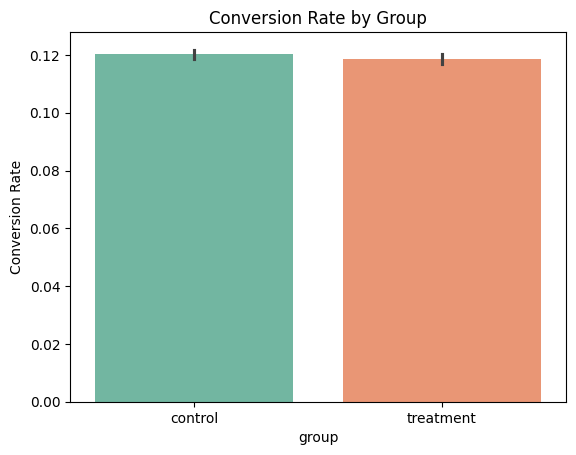

In [ ]:

# Bar plot
sns.barplot(x="group", y="converted", data=df, ci=95, palette="Set2")
plt.title("Conversion Rate by Group")
plt.ylabel("Conversion Rate")
plt.show()

## 5. Hypothesis Testing
We perform a **two-proportion z-test** to check if the difference in conversion rates is statistically significant.


In [ ]:
# Counts of conversions
counts = df.groupby("group")["converted"].sum().values
nobs = df.groupby("group")["converted"].count().values


In [ ]:
# Z-test
z_stat, p_val = proportions_ztest(counts, nobs, alternative='two-sided')


In [ ]:
# Confidence Interval for difference
ci_low, ci_upp = confint_proportions_2indep(counts[0], nobs[0], counts[1], nobs[1], method='agresti-coull')

In [ ]:
print(f"Z-statistic: {z_stat:.2f}")
print(f"P-value: {p_val:.4f}")
print(f"95% CI for conversion difference: {ci_low:.4f} to {ci_upp:.4f}")

Z-statistic: 1.19
P-value: 0.2323
95% CI for conversion difference: -0.0009 to 0.0038


## 6. Power & Effect Size Analysis


In [ ]:
from statsmodels.stats.power import NormalIndPower

# Effect size = difference in conversion rates
p1, p2 = conversion_rates
effect_size = abs(p1 - p2)
p1,p2

(0.12017335110577627, 0.11872633318688676)

In [ ]:

# Power calculation (80%)
analysis = NormalIndPower()
power = analysis.solve_power(effect_size=effect_size, nobs1=nobs[0], alpha=0.05, ratio=nobs[1]/nobs[0])
print(f"Statistical Power of the test: {power:.3f}")

Statistical Power of the test: 0.067


In [ ]:
from statsmodels.stats.power import NormalIndPower

power_analysis = NormalIndPower()

required_n = power_analysis.solve_power(effect_size=effect_size,
                                        alpha=0.05,
                                        power=0.8,
                                        ratio=1)
print("Required sample size per group:", required_n)


Required sample size per group: 7497022.04985108


## 6. Conclusion

- The **conversion rate** of the control group (old page) was **~12.02%**, while the treatment group (new page) was **~11.87%**.  
- A **two-proportion z-test** was conducted, resulting in a **p-value of 0.2323**, which is greater than the 0.05 significance threshold.  
  - ✅ This means we **fail to reject the null hypothesis**.  
  - There is **no statistically significant difference** in conversion rates between the old and new pages.  

- The **95% confidence interval** for the difference in conversion rates ranged from **-0.0009 to 0.0038**, which includes **zero**.  
  - ✅ This further supports that the difference is negligible and could be due to random chance.  

- A **power analysis** showed that the current test has very **low power (≈ 6.7%)**.  
  - To achieve 80% power for detecting such a small difference, we would need **~7.5 million users per group**, which is impractical.  

### 📌 Final Insight
The new page **does not show any meaningful improvement** in conversion rates compared to the old page.  
Given the extremely small observed effect and the impractical sample size required to confirm it, the company should **not roll out the new page based on this test alone**. Future experiments could focus on **bigger design changes** or **different features** that are more likely to drive noticeable impact.  
